<a href="https://colab.research.google.com/github/AmitraksharChakraborty/ML_PROJECTS_2024/blob/main/SMSSpamCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#importing the dataset..
dataset=pd.read_csv("SMSSpamCollection", sep='\t', names=['label','message'])

In [ ]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

In [ ]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

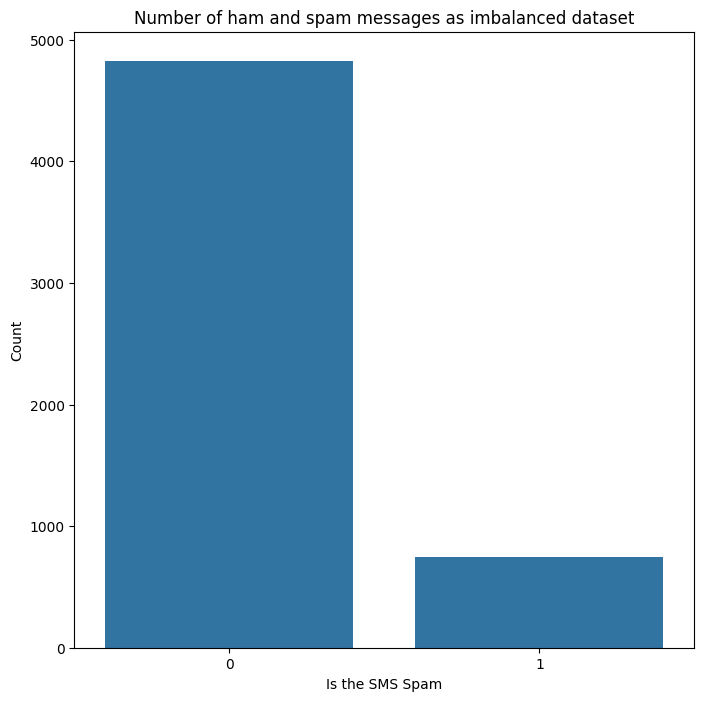

In [ ]:
# countplot for spam vs ham as imbalanced dataset..
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
p=plt.title('Number of ham and spam messages as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam')
p=plt.ylabel('Count')


In [ ]:
only_spam=dataset[dataset['label']==1]

In [ ]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
print('No of spam SMS:', len(only_spam))
print('No of Ham SMS', len(dataset)-len(only_spam))

No of spam SMS: 747
No of Ham SMS 4825


In [ ]:
# count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0]) # Original line causing error
# Check if only_spam.shape[0] is 0 before performing division
if only_spam.shape[0] == 0:
    count = 0  # or another appropriate value when only_spam is empty
    print("Warning: 'only_spam' DataFrame is empty. 'count' set to 0.")
else:
    count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [ ]:
count=int((dataset.shape[0] - only_spam.shape[0]) /only_spam.shape[0])
count

6

In [ ]:
for i in range(0,count-1):
    dataset=pd.concat([dataset, only_spam])
dataset.shape

(9307, 2)

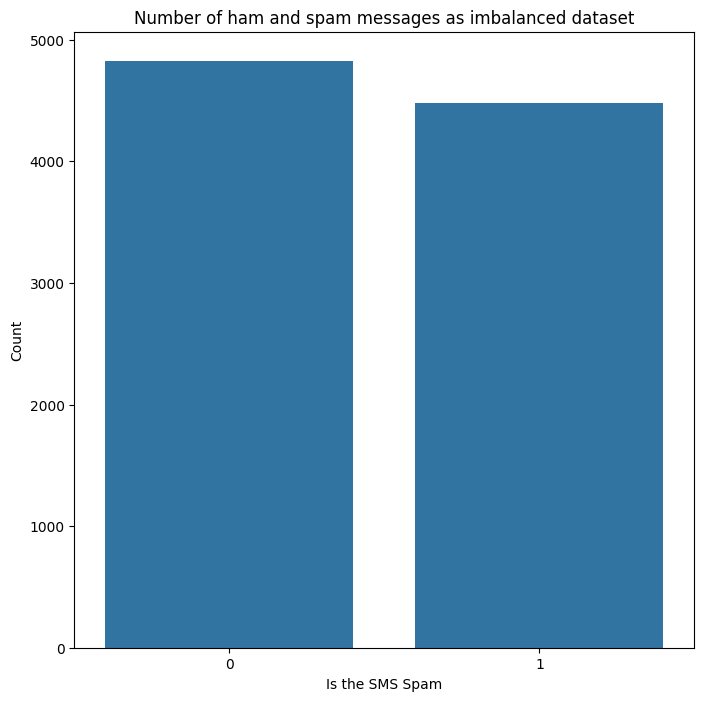

In [ ]:
# countplot for spam vs ham as imbalanced dataset..
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
p=plt.title('Number of ham and spam messages as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam')
p=plt.ylabel('Count')

In [ ]:
dataset['word_count']= dataset['message'].apply(lambda x: len(str(x).split(" ")))
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


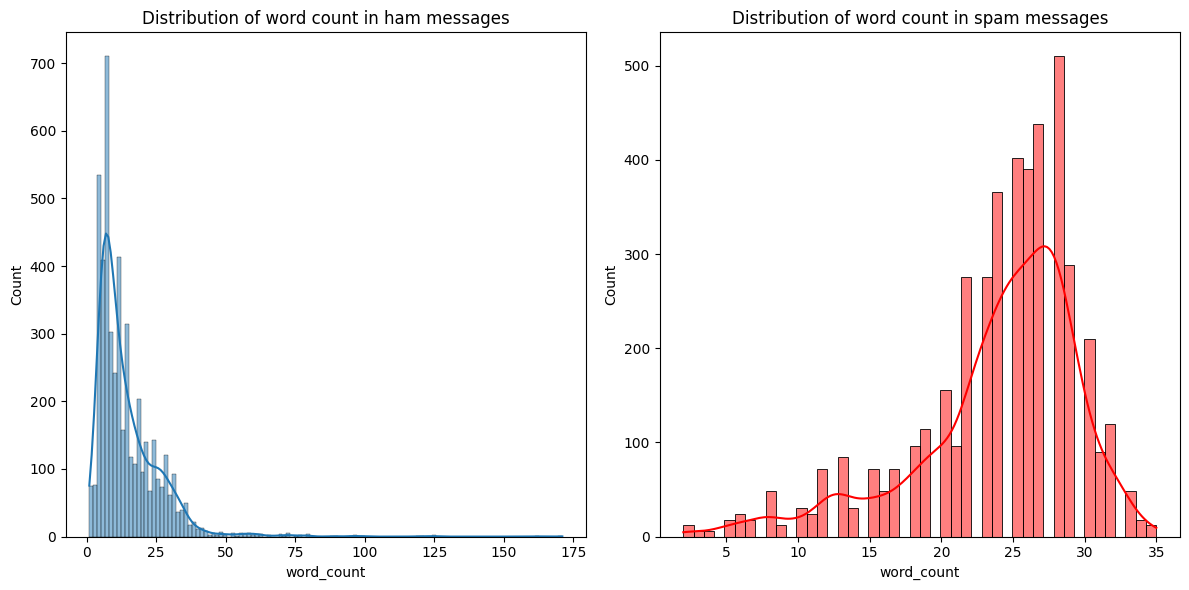

In [ ]:
plt.figure(figsize=(12,6))
#(1,1)
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde='True')
p=plt.title('Distribution of word count in ham messages')

#(1,2)
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,color="red", kde='True')
p=plt.title('Distribution of word count in spam messages')

plt.tight_layout()
plt.show()

In [ ]:
#creating new features of containing currency symbols
def currency_present(data):
  currency_symbols= ['$','€','£','₹']
  for i in currency_symbols:
    if i in data:
      return 1
  return 0


In [ ]:
dataset["contains_currency_symbols"]=dataset["message"].apply(currency_present)

In [ ]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


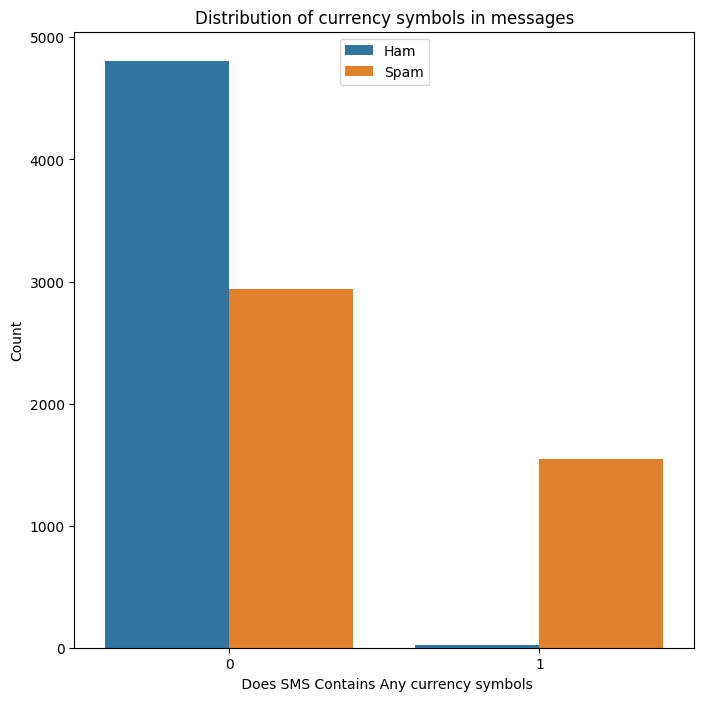

In [ ]:
plt.figure(figsize=(8,8))

g=sns.countplot(x='contains_currency_symbols',data=dataset,hue='label')
p=plt.title('Distribution of currency symbols in messages')
p=plt.xlabel(' Does SMS Contains Any currency symbols')
p=plt.ylabel('Count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [ ]:
#ceating new feature of containing numbers...
def number(data):
  for i in data:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

In [ ]:
dataset["contains_numbers"]=dataset["message"].apply(number)
dataset

,label,message,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


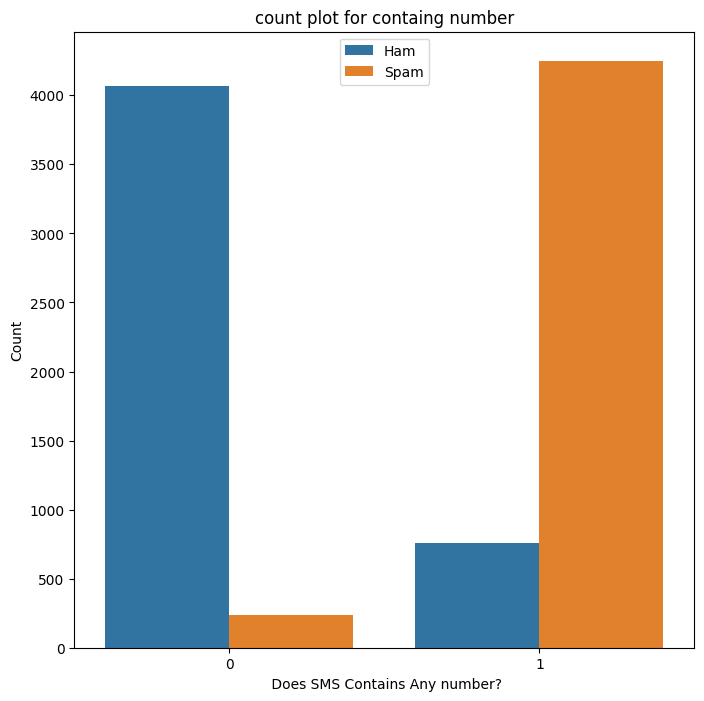

In [ ]:
plt.figure(figsize=(8,8))

g=sns.countplot(x='contains_numbers',data=dataset,hue='label')
p=plt.title('count plot for containg number')
p=plt.xlabel(' Does SMS Contains Any number?')
p=plt.ylabel('Count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [ ]:
#everything we have done till now is the pre proseccing . now another preproseccing is data clening.
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
corpus=[]
ps=PorterStemmer()
wnlr=WordNetLemmatizer()
for sms in list(dataset['message']):
  review=re.sub('[^a-zA-Z]',' ',sms)
  #review=review.lower()
  #review=review.split()
  message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms) #cleaning the special char and number too
  message=message.lower()
  message=message.split()
  message=[word for word in message if word not in set(stopwords.words('english'))]
  message=[wnlr.lemmatize(word) for word in message if word not in set(stopwords.words('english'))]
  message=' '.join(message)
  corpus.append(message)



In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [ ]:
#creating the Bag of words model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()


In [ ]:
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']


In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
# Corrected import statement: changed 'sklearn.matrics' to 'sklearn.metrics'
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,an,another,answer,anything,anytime,apply,area,around,asap,ask,asked,attempt,auction,await,awaiting,award,awarded,away,babe,baby,back,balance,best,better,bid,big,birthday,bit,biz,bluetooth,bonus,book,bored,box,boy,break,bt,buy,bx,call,...,uz,valid,valued,video,visit,voucher,wait,waiting,wan,wanna,want,wap,wat,way,wb,wc,week,weekend,weekly,welcome,well,went,wid,win,winner,wish,within,wk,wkly,word,work,world,worth,would,wq,www,wx,xh,xmas,xx,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
6067,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7563,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443873,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.523006,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3810,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4472,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5507,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.523409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8832,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.442669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0

In [ ]:
#Naive Bayes models..
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [ ]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       952
           1       0.95      0.94      0.94       910

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



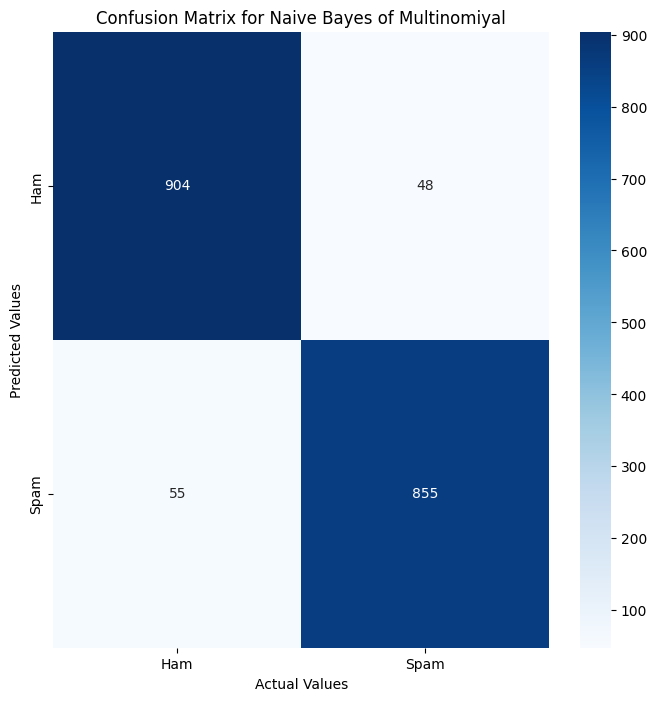

In [ ]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,8))
axis_labels=['Ham','Spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='d',cmap='Blues')
p=plt.title('Confusion Matrix for Naive Bayes of Multinomiyal')
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.004


In [ ]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       952
           1       0.96      1.00      0.98       910

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [ ]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[917,  35],
       [  4, 906]])

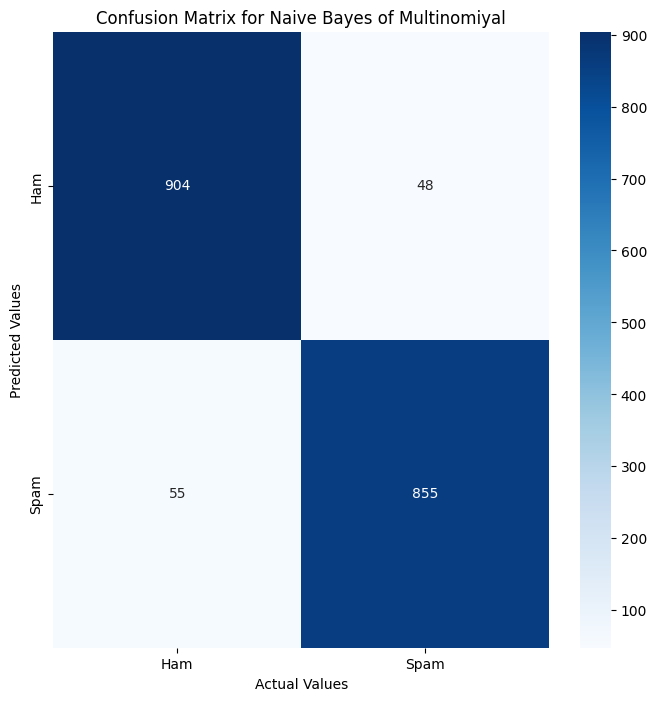

In [ ]:
plt.figure(figsize=(8,8))
axis_labels=['Ham','Spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='d',cmap='Blues')
p=plt.title('Confusion Matrix for Naive Bayes of Multinomiyal')
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [ ]:
def predict_spam(sms):
  review=re.sub('[^a-zA-Z]',' ',sms)
  #review=review.lower()
  #review=review.split()
  message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms) #cleaning the special char and number too
  message=message.lower()
  message=message.split()
  message=[word for word in message if word not in set(stopwords.words('english'))]
  message=[wnlr.lemmatize(word) for word in message if word not in set(stopwords.words('english'))]
  message=' '.join(message)
  temp=tfidf.transform([message]).toarray()
  return dt.predict(temp)
